In [1]:
! swig -c++ -python swig/poisson_mg.i
! python swig/setup.py build_ext --inplace

In [2]:
import sys
import os
sys.path.append( os.path.abspath("swig") )

In [3]:
from mpl_toolkits.mplot3d import Axes3D 
import poisson_mg
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import time

In [4]:
acc = 1e-6
L = 16
h = 1/(L+1)
rho = np.zeros( (L,L))
rho[L//2,L//2] = 10./h**2
pmg = poisson_mg.poisson_mg_double(rho, acc, L)

In [5]:
t1 = time.perf_counter()
pmg.execute()
t2 = time.perf_counter()
print("time elapsed = ", (t2-t1))

time elapsed =  0.00034739900002023205
step 0
make u
make u
make u
make u
make u


Text(0.5, 0.5, 'y')

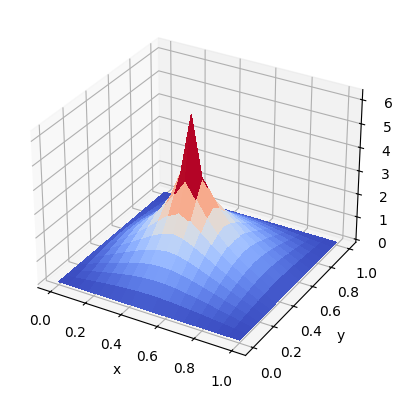

In [7]:
a = pmg.get_psi()
# Define the axes
x = np.arange(0, h*(L+2), h)
y = np.arange(0, h*(L+2), h)
# Get the grid
X, Y = np.meshgrid(x, y)
# Set Z to the poisson V[i][j]
Z = np.array( a )

fig = plt.figure(1)
ax = fig.add_subplot(projection='3d')
sur = ax.plot_surface( X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False )
plt.xlabel("x")
plt.ylabel("y")